# Table of Contents
>## 1. Bayesian Classification
* 1.1. Approach
* 1.2. Laplace Approximation
* 1.3. Laplace Approximation applied to Bayesian Logistic Regression
* 1.4. Example - 1D dataset

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
# The usual notebook preferences

%config InlineBackend.figure_format = 'svg'

import numpy
import sys
import matplotlib.pyplot as plt

sys.path.append('..')
from helper_functions import *

set_notebook_preferences()

HTML(toggle_code("import functions"))

<IPython.core.display.HTML object>

# 1. Bayesian Classification

## 1.1. Approach

* **Step 1. Write down the likelihood $p(\mathcal{D}|\mathbf{w})$ of the generative model**

>* This is just the likelihood of the complete dataset

* **Step 2. Assume a prior $p(\mathbf{w})$ over the parameter(s) of the model**

>* In regression, **gaussian conjugate prior** was picked to simplify calculation
>* **However,** it is not possible to find a prior conjugate to this likelihood
>* $\therefore$ Assume an **isotropic gaussian prior** with mean $0$ and covariance matrix $\boldsymbol{\Sigma}_0 = \lambda I$ over the weights


* **Step 3. Apply Bayes' rule to find the posterior $p(\mathbf{w}|\mathcal{D})$**

>* Use **Laplace approximation** (approximates the likelihood using a multivariate gaussian)
>* Then, the approximate posterior will also be gaussian

* **Step 4. Calculate the predictive distribution $p(y^*| \mathcal{D})$**

>* From the gaussian posterior, obtain the predictive distribution $p(y^*| \mathcal{D})$

* **Summary:**

>1. Likelihood $p(\mathcal{D}|\mathbf{w})$ as obtained already.
2. Assume a gaussian prior $\mathcal{N}(\mathbf{w}; 0, \boldsymbol{\Sigma}_0)$.
3. Apply the Laplace approximation $p(\mathcal{D}|\mathbf{w}) \approx \mathcal{N}(\mathbf{w}; \boldsymbol{\mu}, \boldsymbol{\Sigma})$ and use it to calulate an approximation of the posterior $p(\mathbf{w}|\mathcal{D})$.
4. Calculate the approximate predictive distribution $p(y^*| \mathcal{D})$.



## 1.2. Laplace Approximation

* Consider a distribution $p(z)$ with its mode at $z_0$
* Expand $\text{log}p(z)$ using **Taylor expansion** (linear term vanish because we are at a maximum)

>\begin{align}
\text{log}~p(z) \approx \text{log}~p(z_0) + \frac{1}{2}(z - z_0)^2\frac{d^2}{dz^2}\text{log}~p(z)
\end{align}

* **Laplace approximation of $p(z)$**

>\begin{align}
\text{log}~\mathcal{N}(z; z_0, \sigma^2) = \text{const. } - \frac{1}{2\sigma^2}(z - z_0)^2
\end{align}

>* Where,
>$$\frac{1}{\sigma^2} = - \frac{d^2}{dz^2}\text{log}~p(z)$$

* **Example**:

>\begin{align}
p(z) = \frac{a}{\pi}\frac{1}{a^2 + z^2}~\text{ (already normalised).}
\end{align}
>* Mode at $z = 0$
>\begin{align}
\frac{d^2 p(z)}{dz^2} = \bigg[ \frac{4z^2}{(a^2 + z^2)^2} - \frac{2}{a^2 + z^2} \bigg]_{z = 0} = -\frac{2}{a^2}
\end{align}
>* Laplace approximation of $p(z)$:
>$$
\mathcal{N}(z; 0, a^2/2)
$$

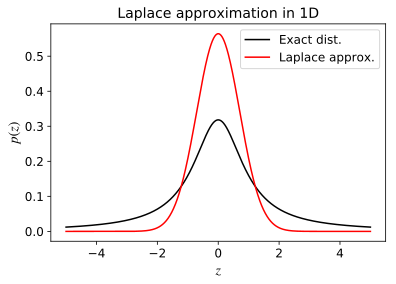

<IPython.core.display.HTML object>

In [4]:
a = 1
z_ = np.linspace(-5, 5, 1000)
p_ = a/(np.pi * (a**2 + z_**2))
gaussian = 1/(np.pi*a**2)**0.5 * np.exp(-1/a**2*z_**2)

plt.plot(z_, p_, color = 'black', label = 'Exact dist.')
plt.plot(z_, gaussian, color = 'red', label = 'Laplace approx.')
beautify_plot({"title":r"Laplace approximation in 1D", "x":"$z$", "y":"$p(z)$"})
plt.gca().legend(fontsize = 12)
plt.show()

HTML(toggle_code())

* **For a multivariate distribution $p(\mathbf{z})$, the Laplace approximation is a multivariate gaussian**:

>\begin{align}
\text{log}~p(\mathbf{z}) &\approx \text{log}~p(\mathbf{z}_0) + \frac{1}{2}\sum_i\sum_j (z_j - z_{0i})^2\frac{d}{dz_i}\frac{d}{dz_j}\text{log}~p(x)\\
~\\
&= \text{log}~p(\mathbf{z}_0) + \frac{1}{2} (\mathbf{z} - \mathbf{z}_0)^\top \bigg[\nabla \nabla \text{log}~p(x)\bigg] (\mathbf{z} - \mathbf{z}_0)\\
\end{align}
>$$\;$$
>* Multivariate Gaussian:
>$$\;$$
>\begin{align}
\text{log}~q(\mathbf{z}) = \text{const. } - \frac{1}{2} (\mathbf{z} - \mathbf{z}_0)^\top \boldsymbol{\Sigma}^{-1} (\mathbf{z} - \mathbf{z}_0)\\
\end{align}
>$$\;$$
>* Therefore
>$$\;$$
>\begin{align}
\boldsymbol{\Sigma}^{-1} = -\nabla \nabla \text{log}~p(x).\\
\end{align}
>$$\;$$
>* **Hessian Matrix**: matrix containing the double derivatives of a quantity as its entries
>$$\;$$
>$$\nabla \nabla \text{log}~p(x)$$

## 1.3. Laplace Approximation applied to Bayesian Logistic Regression

* **Approach**:

>* Determine the mode of the posterior (use gradient ascent to approximate the mode)
>* Calculate the Hessian at that mode

* **Obtaining Hessian**:

>* Use a gaussian prior: $\mathcal{N}(\mathbf{w}; \mathbf{m}_0, \boldsymbol{\Sigma}_0)$
>$$\;$$
>\begin{align}
p(\mathbf{w}| \{\mathbf{y}_n, \mathbf{x}_n\}) &\propto p(\{\mathbf{y}_n, \mathbf{x}_n\} | \mathbf{w}) p(\mathbf{w})\\
~\\
\text{log}~p(\mathbf{w}| \{\mathbf{y}_n, \mathbf{x}_n\}) &= -\frac{1}{2} (\mathbf{w} - \mathbf{m}_0)^\top \boldsymbol{\Sigma}^{-1}_0(\mathbf{w} - \mathbf{m}_0) + \sum^N_{n = 1} y_n\text{log}~\sigma(\mathbf{w}^\top\mathbf{x}_n)+(1-y_n)\text{log}~\big(1 - \sigma(\mathbf{w}^\top\mathbf{x}_n)\big)\\
~\\
\nabla \text{log}~p(\mathbf{w}| \{\mathbf{y}_n, \mathbf{x}_n\}) &= -\boldsymbol{\Sigma}^{-1}_0(\mathbf{w} - \mathbf{m}_0) + \sum^N_{n = 1} \big(y_n - \sigma(\mathbf{w}^\top\mathbf{x}_n)\big)\mathbf{x}_n\\
~\\
\boldsymbol{\Sigma}^{-1} = -\nabla \nabla \text{log}~p(\mathbf{w}| \{\mathbf{y}_n, \mathbf{x}_n\}) &= \boldsymbol{\Sigma}^{-1}_0 + \sum^N_{n = 1} \sigma(\mathbf{w}^\top\mathbf{x}_n)\big(1 - \sigma(\mathbf{w}^\top\mathbf{x}_n)\big)\mathbf{x}_n \mathbf{x}_n^\top\\
\end{align}
>$$\;$$
>* $\therefore$ The Laplace approximation: $\mathcal{N}(\mathbf{w}; \mathbf{w}_{MAP}, \boldsymbol{\Sigma})$

* **Predictive Distribution**:

>\begin{align}
p(y^* = 1| \mathbf{x}^*, \{y_n, \mathbf{x}_n\}) &= \int p(y^* = 1| \mathbf{x}^*, \mathbf{w}) p(\mathbf{w} | \{y_n, \mathbf{x}_n\})d\mathbf{w} = \int \sigma(\mathbf{w}^\top\mathbf{x}) p(\mathbf{w} | \{y_n, \mathbf{x}_n\})d\mathbf{w}\\
&\approx \int \sigma(\mathbf{w}^\top\mathbf{x}) q(\mathbf{w})d\mathbf{w}\\
&= \int \int \sigma(a)\delta(a - \mathbf{w}^\top\mathbf{x})da~q(\mathbf{w})d\mathbf{w}\\
&= \int \sigma(a)p(a)da, \text{ where }~p(a) = \int \delta(a - \mathbf{w}^\top\mathbf{x})q(\mathbf{w})d\mathbf{w}\\
\end{align}
>$$\;$$
>* Our expression for distribution $p(a)$ can be simplified by noting that the Dirac-delta $\delta(a - \mathbf{w}^\top\mathbf{x})$ imposes a linear constraint on $\mathbf{w}$ so the effect of the integral $\int \delta(a - \mathbf{w}^\top\mathbf{x}) q(\mathbf{w}) d\mathbf{w}$ is to integrate out $\mathbf{w}$ along all directions orthogonal to $\mathbf{x}$. Since a marginal of a gaussian is also a gaussian the resulting distribution $p(a)$ will also be gaussian, and it suffices to find its mean and variance to fully characterise it:

* **Mean and variance of $p(a)$**:

>\begin{align}
\mu_a &= \int a p(a) da = \int a \int \delta(a - \mathbf{w}^\top\mathbf{x}) q(\mathbf{w}) d\mathbf{w} da = \int  \mathbf{w}^\top\mathbf{x} q(\mathbf{w}) d\mathbf{w} = \mathbf{w}_{MAP}^\top\mathbf{x}\\
~\\
\sigma_a^2 &= \int \big(a^2 - \mu_a^2\big)p(a) da = \int \big(a^2 - \mu_a^2\big)\delta(a - \mathbf{w}^\top\mathbf{x})q(\mathbf{w}) d\mathbf{w} da = \int \big((\mathbf{w}^\top\mathbf{x})^2 - (\mathbf{w}_{MAP}^\top\mathbf{x})^2\big)q(\mathbf{w}) d\mathbf{w}\\
&= \int (\mathbf{w}^\top\mathbf{x})^2 q(\mathbf{w}) d\mathbf{w} - \mathbf{x}^\top\mathbf{w}_{MAP}\mathbf{w}_{MAP}^\top\mathbf{x}\\
&= \mathbf{x}^\top \bigg[\int\mathbf{w}\mathbf{w}^\top q(\mathbf{w}) d\mathbf{w} \bigg]\mathbf{x} - \mathbf{x}^\top\mathbf{w}_{MAP}\mathbf{w}_{MAP}^\top\mathbf{x}\\
&= \mathbf{x}^\top\bigg[\mathbf{w}_{MAP}\mathbf{w}_{MAP}^\top + \Sigma \bigg] \mathbf{x} - \mathbf{x}^\top\mathbf{w}_{MAP}\mathbf{w}_{MAP}^\top\mathbf{x}\\
&= \mathbf{x}^\top\Sigma\mathbf{x}
\end{align}
>$$\;$$
>* Therefore $p(a) = \mathcal{N}(a; \mathbf{w}_{MAP}, \mathbf{x}^\top\Sigma\mathbf{x})$
>* Still the integral $\int \sigma(a)\mathcal{N}(a; \mathbf{w}_{MAP}, \mathbf{x}^\top\Sigma\mathbf{x})da$ is the convolution of a sigmoid with a gaussian and cannot be evaluated explicitly, so another approximation must be made. 

* **Approximate the sigmoid using the probit function**:

>$$\sigma(a) \approx \Phi(\lambda a) = \int_{-\infty}^{\lambda a} \mathcal{N}(z|0, 1) dz$$
>$$\;$$
>* The scaling constant $\lambda$ is picked such that the gradients of $\sigma(a)$ and $\Phi(\lambda a)$ are equal at the origin:

* **Comparison**:

><div class="row">
  <div class="column">
    <img src="logit_probit_scaled.svg" alt="Snow" style="width:50%; float: center; padding: 0px">
  </div>
</div>

* **Predictive Distribution Integral**
>* Under this approximation, it can be shown that the predictive distribution integral is equal to another scaled probit:
>$$\;$$
>\begin{align}
\int \sigma(a)\mathcal{N}(a; \mu, \sigma^2)da &\approx \int \Phi(\lambda a)\mathcal{N}(a; \mu, \sigma^2)da\\
&= \Phi\Bigg(\frac{\mu}{(\lambda^{-2} + \sigma^2)^{1/2}}\Bigg), \text{ where } \mu = \mathbf{w}_{MAP}^\top \mathbf{x}, ~\sigma^2 = \mathbf{x}^\top\Sigma\mathbf{x}\\
\end{align}

## 1.4. Example - 1D dataset

In [5]:
def sig(x):
    
    return 1/(1 + np.exp(-x)) # define logistic function for convenience

def gradient_ascent(x, y, init_weights, no_steps, stepsize): # x: train inputs, y: train labels, rest self explanatory
    
    x = np.append(np.ones(shape = (x.shape[0], 1)), x, axis = 1) # add 1's to the inputs as usual
    
    w = init_weights.copy() # copy weights (to prevent changing init_weights as a side-effect - don't dwell on this)
    
    w_history, log_liks = [], [] # arrays for storing weights and log-liklihoods at each step
    
    for n in range(no_steps): # in this part we optimise log-lik w.r.t. w
        
        log_liks.append(np.sum(y * np.log(sig(x.dot(w))) + (1 - y) * np.log(1 - sig(x.dot(w))))) # record current log-lik
        
        w_history.append(w.copy()) # record current weights (use w.copy() to prevent aliasing - don't dwell on this)
    
        sigs = sig(x.dot(w)) # using our neat convenience function
        
        dL_dw = np.mean((y - sigs)*x.T, axis = 1) # calculate gradient of log-likelihood w.r.t. w
        
        w += stepsize * dL_dw # update weights and repeat
    
    return np.array(w_history), np.array(log_liks) 

HTML(toggle_code("gradient ascent function"))

<IPython.core.display.HTML object>

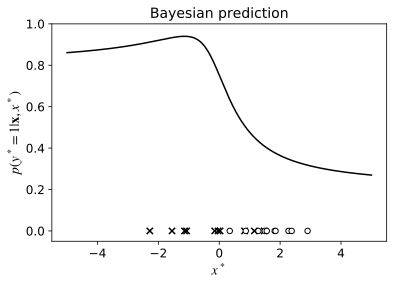

<IPython.core.display.HTML object>

In [6]:
x = np.load('class_1d_inputs.npy')
y = np.load('class_1d_labels.npy')
x_train, x_test, y_train, y_test = x[:20], x[20:], y[:20], y[20:]

w_history, log_liks = gradient_ascent(x_train, y_train, np.zeros(shape = 1 + x.shape[-1]), 10**2, 1)
w_map = w_history[-1]

x_ = np.append(np.ones(shape = (x.shape[0], 1)), x, axis = -1)
sigs = sig(x_.dot(w_map))
cov_0 = np.eye(2)*1
cov = cov_0 + (sigs*(1 - sigs)*x_.T).dot(x_)

xs = np.stack([np.ones(shape = (2000,)), np.linspace(-5, 5, 2000)], axis = 1)
mu = xs.dot(w_map)
var = np.sum((xs).dot(cov)*xs, axis = -1)

from scipy.stats import norm
probit = norm.cdf(xs)
probit_scaled = norm.cdf(mu/(8/np.pi + var)**0.5)

x_1, x_2 = x_train[np.where(y_train == 0)[0]], x_train[np.where(y_train == 1)[0]]
plt.scatter(x_1, np.zeros_like(x_1), color = 'white', edgecolor = 'black', marker = 'o', s = 30,
            zorder = 2, label = '$y = 0$')
plt.scatter(x_2, np.zeros_like(x_2), color = 'black', marker = 'x', s = 40, zorder = 1, label = '$y = 1$')
plt.plot(xs[:, 1], probit_scaled, color = 'black')
beautify_plot({"title":r"Bayesian prediction", "x":"$x^*$", "y":"$p(y^* = 1|\mathbf{x}, x^*)$"})
plt.ylim([-0.05, 1])
plt.show()

HTML(toggle_code())